# Coding part 1: Data and Model

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [6]:
## Do some statistical measures

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<Axes: xlabel='Gene One', ylabel='Gene Two'>

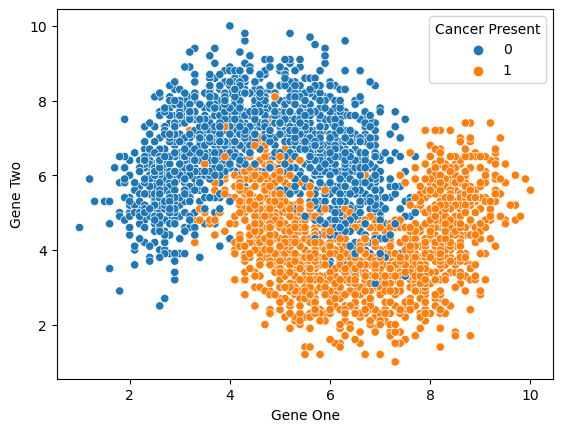

In [8]:
sns.scatterplot(data = df ,x = "Gene One" ,y = "Gene Two" ,hue = "Cancer Present")

<Axes: xlabel='Gene One', ylabel='Gene Two'>

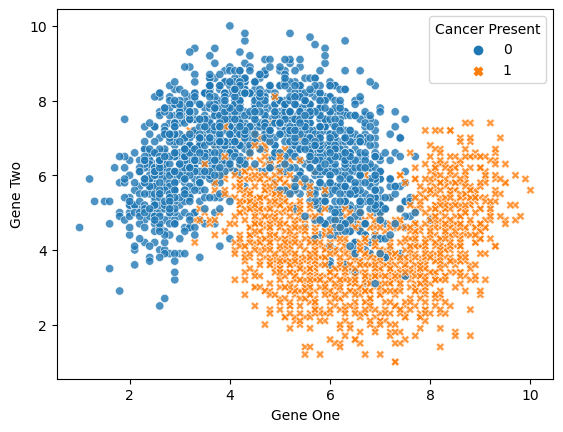

In [14]:
sns.scatterplot(data = df ,x = "Gene One" ,y = "Gene Two" ,hue = "Cancer Present" ,alpha = 0.8 , style = "Cancer Present")

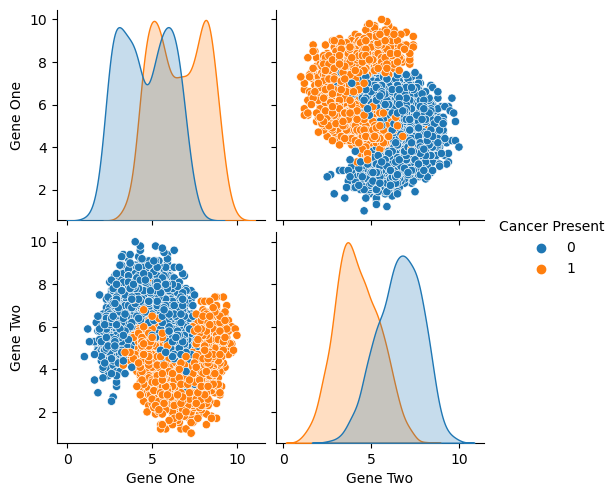

In [16]:
sns.pairplot(data= df ,hue = "Cancer Present")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
x = df.drop("Cancer Present" , axis = 1)
y = df["Cancer Present"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

x_scaled_train = scaler.fit_transform(X_train)
x_scaled_test = scaler.transform(X_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(x_scaled_train ,y_train)

KNeighborsClassifier()

In [28]:
knnModel.score(x_scaled_test ,y_test) 

0.9272727272727272

In [29]:
y_preds = knnModel.predict(x_scaled_test)

In [36]:
from sklearn.metrics import confusion_matrix ,classification_report ,accuracy_score

confusion_matrix(y_preds ,y_test)

array([[478,  40],
       [ 32, 440]], dtype=int64)

In [31]:
print(classification_report(y_preds ,y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       518
           1       0.92      0.93      0.92       472

    accuracy                           0.93       990
   macro avg       0.93      0.93      0.93       990
weighted avg       0.93      0.93      0.93       990



# Coding part 2: Choosing K

In [43]:
test_error_rate = []

In [44]:
for k in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors= k)
    knn1.fit(x_scaled_train ,y_train)
    y_preds = knn1.predict(x_scaled_test)
    error = 1-accuracy_score(y_preds ,y_test)
    test_error_rate.append(error)

In [45]:
test_error_rate

[0.10202020202020201,
 0.10303030303030303,
 0.07878787878787874,
 0.07878787878787874,
 0.07272727272727275,
 0.06666666666666665,
 0.0636363636363636,
 0.06161616161616157,
 0.06565656565656564,
 0.06666666666666665,
 0.06262626262626259,
 0.06464646464646462,
 0.06464646464646462,
 0.05858585858585863,
 0.05555555555555558,
 0.05757575757575761,
 0.05757575757575761,
 0.05555555555555558,
 0.05757575757575761,
 0.054545454545454564,
 0.0565656565656566,
 0.05555555555555558,
 0.05858585858585863,
 0.05858585858585863,
 0.05959595959595965,
 0.0565656565656566,
 0.05858585858585863,
 0.05757575757575761,
 0.05959595959595965]

Text(0, 0.5, 'Error')

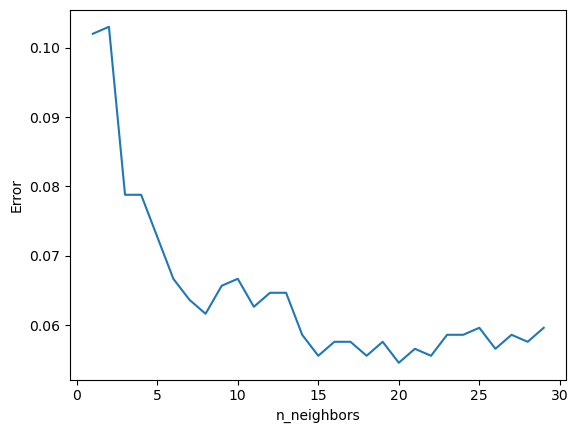

In [46]:
plt.plot(range(1,30),test_error_rate)
plt.xlabel("n_neighbors")
plt.ylabel("Error")

## Setting a pipeline for smoother operation

In [51]:
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [50]:
operation = [("scaler",scaler) ,("knn",knn)]
from sklearn.pipeline import Pipeline

pipe = Pipeline(operation)

In [52]:
k_n = list(range(1,30))

In [53]:
params = {"knn__n_neighbors": k_n}

In [74]:
pipe_knn_cv = GridSearchCV(pipe ,param_grid = params ,cv = 5 ,scoring = "accuracy")

In [75]:
pipe_knn_cv.fit(X_train ,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [76]:
pipe_knn_cv.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [77]:
y_preds = pipe_knn_cv.predict(X_test)
print(classification_report(y_preds ,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       517
           1       0.93      0.95      0.94       473

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990

